### 1. Train Decision Tree Classifier on Iris dataset and print accuracy

In [1]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))


Accuracy: 1.0


### 2. Decision Tree using Gini Impurity and feature importance

In [2]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
model = DecisionTreeClassifier(criterion="gini")
model.fit(X, y)

print("Feature Importances:", model.feature_importances_)


Feature Importances: [0.01333333 0.         0.56405596 0.42261071]


### 3. Decision Tree using Entropy

In [3]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))


Accuracy: 0.9333333333333333


### 4. Decision Tree Regressor with MSE

In [4]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

print("MSE:", mean_squared_error(y_test, model.predict(X_test)))


MSE: 0.5318924209538759


### 5. Visualize Decision Tree

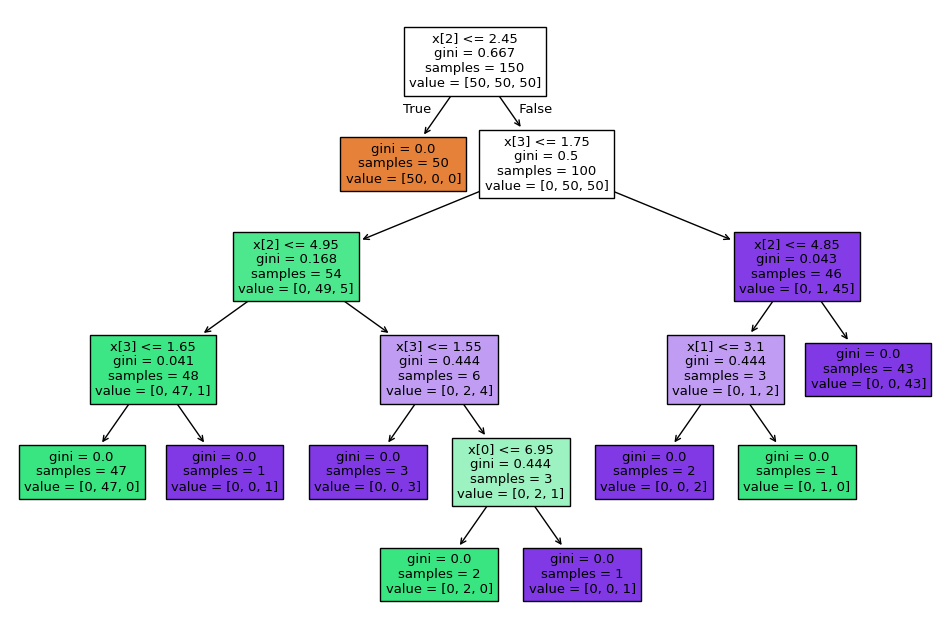

In [7]:

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

X, y = load_iris(return_X_y=True)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = DecisionTreeClassifier()
model.fit(X, y)

plt.figure(figsize=(12,8))
plot_tree(model, filled=True)
plt.show()


### 6. Max depth comparison

In [8]:

model_limited = DecisionTreeClassifier(max_depth=3)
model_full = DecisionTreeClassifier()

model_limited.fit(X_train, y_train)
model_full.fit(X_train, y_train)

print("Limited depth accuracy:", model_limited.score(X_test, y_test))
print("Full tree accuracy:", model_full.score(X_test, y_test))


Limited depth accuracy: 1.0
Full tree accuracy: 1.0


### 7. min_samples_split comparison

In [9]:

model_custom = DecisionTreeClassifier(min_samples_split=5)
model_default = DecisionTreeClassifier()

model_custom.fit(X_train, y_train)
model_default.fit(X_train, y_train)

print("Custom:", model_custom.score(X_test, y_test))
print("Default:", model_default.score(X_test, y_test))


Custom: 1.0
Default: 1.0


### 8. Feature scaling comparison

In [10]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model_scaled = DecisionTreeClassifier()
model_unscaled = DecisionTreeClassifier()

model_scaled.fit(X_scaled, y)
model_unscaled.fit(X, y)

print("Scaled accuracy:", model_scaled.score(X_scaled, y))
print("Unscaled accuracy:", model_unscaled.score(X, y))


Scaled accuracy: 1.0
Unscaled accuracy: 1.0


### 9. One-vs-Rest strategy

In [11]:

from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(DecisionTreeClassifier())
ovr.fit(X_train, y_train)

print("OvR Accuracy:", ovr.score(X_test, y_test))


OvR Accuracy: 1.0


### 10. Feature importance display

In [12]:

model = DecisionTreeClassifier()
model.fit(X, y)

for i, imp in enumerate(model.feature_importances_):
    print(f"Feature {i}: {imp}")


Feature 0: 0.013333333333333329
Feature 1: 0.013333333333333329
Feature 2: 0.05072262479871173
Feature 3: 0.9226107085346216


### 11. Regressor max_depth comparison

In [13]:

model_limited = DecisionTreeRegressor(max_depth=5)
model_full = DecisionTreeRegressor()

model_limited.fit(X_train, y_train)
model_full.fit(X_train, y_train)

print("Limited MSE:", mean_squared_error(y_test, model_limited.predict(X_test)))
print("Full MSE:", mean_squared_error(y_test, model_full.predict(X_test)))


Limited MSE: 0.0
Full MSE: 0.0


### 12. Cost Complexity Pruning

In [14]:

path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

print("CCP Alphas:", ccp_alphas)


CCP Alphas: [0.         0.00809524 0.01111111 0.01111111 0.01621622 0.0241196
 0.24326537 0.33340278]


### 13. Precision, Recall, F1 Score

In [15]:

from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 14. Confusion Matrix

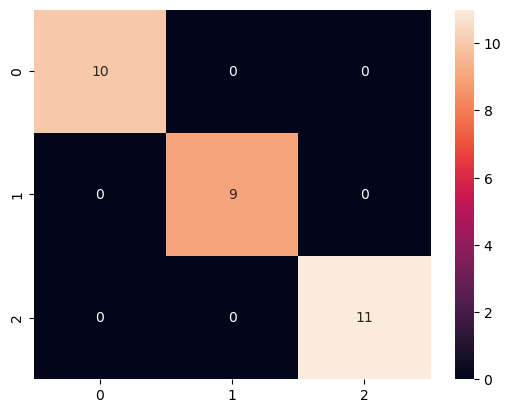

In [16]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()


### 15. GridSearchCV for optimal parameters

In [17]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3,5,10],
    'min_samples_split': [2,5,10]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2}
